# SVM Iris Classification Tutorial

This tutorial was made to complete Week 2's task for the ML Internship. It involves making a classification model to classify 3 different types of iris plants by using the data in the [Iris Dataset](https://www.google.com "UCI Machine Learning Repository") to develop an SVM large margin classifier.

## Importing The Libraries

We'll start by importing the libaries we'll need to load our data and develop & test our model.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Loading The Data

We'll load that Iris dataset from scikit-learn's datasets.

In [2]:
# Loading the Iris dataset
iris = datasets.load_iris()
features = iris.data
classes = iris.target

# Data Exploration

Now that we've loaded the data, let's plot to try and discover patterns in it that might help us build our model better.

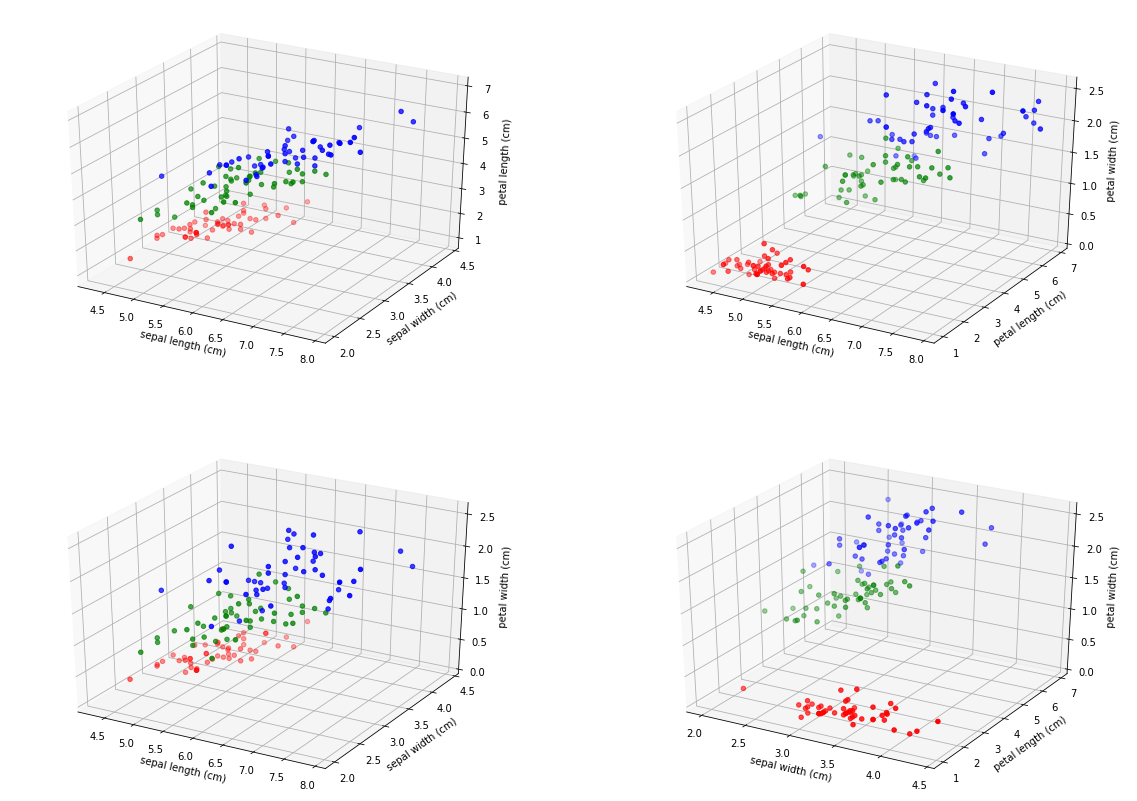

In [3]:
# Loading the feature names to label our axis
names = iris.feature_names

# Assigning colors to each class
colors = np.array(classes, dtype=str)
colors[classes == 0] = 'r'
colors[classes == 1] = 'g'
colors[classes == 2] = 'b'

# Feauture combinations we can represent in 3D
combinations = [[0, 1, 2], [0, 2, 3], [0, 1, 3], [1, 2, 3]]

fig = plt.figure(figsize=(10*2,15*2))

for i in range(0,4):
    comb = combinations[i]
    sub = fig.add_subplot(42*10+(i+1), projection='3d')
    sub.scatter(features[:, comb[0]], features[:, comb[1]], features[:, comb[2]], c=colors)
    sub.set_xlabel(names[comb[0]])
    sub.set_ylabel(names[comb[1]])
    sub.set_zlabel(names[comb[2]])

Looking at the plots we can clearly see that one of the 3 classes, namely the red one, is linearly separable from the other two. Meaning, there exists a straight line that can completely seperate the red class from the green and blue classes. Having a linearly seperable dataset usually means our model is going to be simpler and less computationally taxing to develop. Unfortunately, the other 2 classes don't seem to be linearly seperable, making our dataset only partially linearlt seperable. This concept of linear separability will come up again as we discuss the results and try to optimize our model.

## Data Preparation

As you should know, SVMs are sensitive to feature scales. So we'll use scikit-learn's [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html "sklearn.preprocessing.StandardScaler") to normalize our data then we'll use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html "sklearn.model_selection.train_test_split") to shuffle the data to remove any ordering bias, then we'll split it into two subsets, 80% training & 20% testing.

It's important to set `random_state` equal to some constant so we can reproduce our results everytime time we run the code.

In [4]:
# Normalizing the data
scaler = StandardScaler()
normalized = scaler.fit_transform(features, classes)

# Shuffling the data then splitting it into 80% training data & 20% testing data
X_train, X_test, y_train, y_test = train_test_split(normalized, classes, test_size=0.2, random_state=0)

## Model Selection

Selecting the right algorithm/model for a machine learning application is often not as straight forward as one would hope, it usually requires considerable knowledge of the field and of the dataset used in the application and what we wish to get out of it.

Fortunately for us, this choice has already been narrowed quite a bit for us as this is an SVM tutorial after all. And we can narrow it further using this [cheat-sheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) provided by scikit-learn:
![scikit-learn algorithm cheat-sheet](http://scikit-learn.org/stable/_static/ml_map.png)

By following the steps provided above, we'll find that a Linear SVC model fits our dataset which consists of 150 labeled samples.

## Hyperparameter Optimization

Even when the model choice is made easy for us and we're provided with efficient implementations of the algorithms, there's still one very important factor we have to take into consideration, and that factor is our choice of **hyperparameters**.

In our case, we simply need to find a good choice for the regularization parameter **C** which essentially tells our SVM model how much we care about correctly seperating as many instaces as possible versus having the largest minimum margin.

Since the theory for determining how to set C is not very well developed at the moment, most people tend to use cross-validation, which is exactly what we're about to do.

One very effective (and equally very expensive) method for hyperparameter optimization is using grid search alongside cross-validation to find the optimal hyperparameter values for our model by training our model using all the provided hyperparameter combinations and comparing their performance until we find the best one. While such brute force algorithms might be too computaionally heavy for larger datasets, it's not really an issue for our case as we only have 4 features and 150 samples, which our machines can easily work through in no time.

## Implementaion

Now that we have chosen our model and algorithms, we'll proceed to use the implentations provided by scikit-learn to train our model and evaluate its accuracy.

As we decided earlier, our classifier is [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html "sklearn.svm.LinearSVC"), we set `random_state` equal to some constant for reproducibility like we did with train_test_split earlier.

Our hyperparameter optimization algorithm is [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html "sklearn.model_selection.GridSearchCV"), we'll feed it the classifier, the possible values for the hyperparameter we want to optimize (**C**) and the number of cross-validation folds to use.

Note that for the params variable we chose a logspace with `base=2` with a `start=10^-5` and `stop=10^20` with `num=50` being the default value for the number of points in the logspace. These values are experimental values that happened to provide the best results for this specific model and data. Feel free to experiment with your own values to see how the results change and whether or not you can get better results than the ones shown in this tutorial.

In [5]:
# Setting up our LinearSVC classifier
classifier = LinearSVC(loss='hinge', multi_class='ovr', random_state=0)

# Experimental parameters to provide the best results for our specific model and data
params = {'C': np.logspace(10^-5, 10^20, base=2)}

# Feeding our classifier, params and number of cross-validation folds
grid = GridSearchCV(classifier, params, cv=5, scoring='accuracy')

Now we run GridSearchCV to fit the model using our training data and then we take the best classifier it produces from the `best_estimator_` attribute.

In [6]:
# Fitting the model
grid.fit(X_train, y_train)

# Taking the best classifier
best_clf = grid.best_estimator_
print('The optimal C value for our model: %f' %best_clf.C)

The optimal C value for our model: 470.337000


## Results

So now that we have our best classifier, let's measure its accuracy on our training data using LinearSVC's `score` method.

In [7]:
# Printing the model's accuracy on the training data
print('Training Accuracy: %f' %best_clf.score(X_train, y_train))

Training Accuracy: 0.966667


We got an accuracy of 96.67%, which is pretty high but it's still not 100%. This makes sense since the labels in the Iris dataset are only partially linearlly seperable, so we can't really classify them with 100% accuracy using our linear SVC model.

Now let's see if this outcome is generalizable by measuring the classifier's accuracy on our testing data.

In [8]:
# Printing the model's accuracy on the testing data
print('Testing Accuracy: %f' %best_clf.score(X_test, y_test))

Testing Accuracy: 1.000000


Surprisingly enough, our model managed to classifiy our testing data with 100% accuracy. This can be attributed to many factors like the size of our dataset being small and easier to model and also luck, as this means the subset of the data we reserved for training was linearly seperable and therefore it can be accurately and completly classified using our Linear SVC model.

## Improving The Accuracy

Since our data is not linearly seperable we might be able to improve our model's accuracy using kernels. There are several different types of kernels but in this tutorial we'll only try the gaussian `rbf` and polynomial `poly` kernels. Our classifier will be [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html "sklearn.svm.SVC") instead of LinearSVC as it supports the use of kernels.

In [9]:
for kernel in ('rbf', 'poly'):

    # Setting up our SVC classifier
    classifier = SVC(kernel=kernel, gamma='auto', random_state=0)

    # Experimental parameters to provide the best results for our specific model and data
    if (kernel == 'poly'):
        params = {
            'C': np.logspace(-10, 11, base=2),
            'degree': np.arange(2,7),
            'coef0': np.arange(-5,5)
        }
    else:
        params = {'C': np.logspace(-10, 11, base=2)}

    # Feeding our classifier, params and number of cross-validation folds
    grid = GridSearchCV(classifier, params, cv=5, scoring='accuracy')

    # Fitting the model
    grid.fit(X_train, y_train)

    # Taking the best classifier
    best_clf = grid.best_estimator_
    
    print('Kernel: %s' %kernel)
    
    print('The optimal C value for our model: %f' %best_clf.C)
    
    if (kernel == 'poly'):
        print('The optimal degree for our model: %f' %best_clf.degree)
        print('The optimal coef0 value for our model: %f' %best_clf.coef0)

    # Printing the model's accuracy on the training data
    print('Training Accuracy: %f' %best_clf.score(X_train, y_train))

    # Printing the model's accuracy on the testing data
    print('Testing Accuracy: %f' %best_clf.score(X_test, y_test))
    
    if (kernel == 'rbf'):
        print('')

Kernel: rbf
The optimal C value for our model: 0.672950
Training Accuracy: 0.958333
Testing Accuracy: 1.000000

Kernel: poly
The optimal C value for our model: 1.640671
The optimal degree for our model: 3.000000
The optimal coef0 value for our model: 4.000000
Training Accuracy: 0.983333
Testing Accuracy: 1.000000


As we can see above, the gaussian kernel doesn't seem to work too well with our model, in fact it dropped our accuracy from 96.67% to 95.83%. On the other hand, the polynomial kernel increased our accuracy from 96.67% to 98.33% which is a decent improvement to our LinearSVC model.